<a href="https://colab.research.google.com/github/anjanasa13/A-B-testing-for-most-efficient-marketing-strategy/blob/main/A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Two campaigns were performed by a company:

1)Control Campaign

2)Test Campaign

Perform A/B testing to find the best campaign for the company to get more customers.

Importing the necessary python libraries and dataset and getting a glimpse of the dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving control_group.csv to control_group.csv
Saving test_group.csv to test_group.csv


In [2]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

control_data = pd.read_csv("/content/control_group.csv", sep = ";")
test_data = pd.read_csv("/content/test_group.csv", sep = ";")
print(control_data.head())
print(test_data.head())


      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [3]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

Finding null values in the datasets

In [4]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


Control campaign has null values in a row.

Replace these missing values with the mean values of respective columns.

In [5]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(),

                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(),

                             inplace=True)

control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(),

                                      inplace=True)

control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(),

                                         inplace=True)

control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(),

                                      inplace=True)

control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(),

                                     inplace=True)

control_data["Purchases"].fillna(value=control_data["Purchases"].mean(),
                           inplace=True)

In [6]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


No null values in test campaign

Merging both data sets to create a combined dataset.

In [9]:
ab_data = control_data.merge(test_data,
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head())

      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          8125.0             2312.0          1804.0          424.0      275.0  
3          2277.0             2475.0          1984.0         1629.0      734.0  
4          3750.0             2893.0          2617.0         1075.0      668.0  


<ipython-input-9-7aaa495241ed>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data,


Checking the number of samples in each campaign dataset

In [10]:
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


Both the campaigns have 30 samples each.

Moving on to A/B testing to find the best strategy of the two.

To initiate A/B testing, my initial step involves examining the correlation between the number of impressions received from both campaigns and the corresponding expenditures on each campaign.

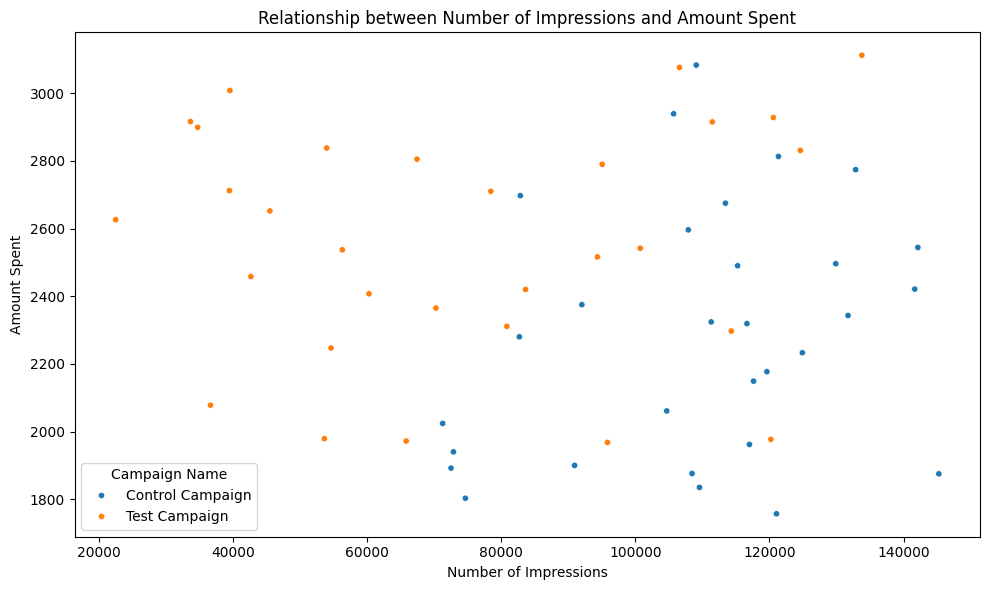

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Use sns.scatterplot() instead of sns.regplot() to utilize the hue parameter
sns.scatterplot(data=ab_data, x="Number of Impressions", y="Amount Spent", hue="Campaign Name", s=20)

plt.title("Relationship between Number of Impressions and Amount Spent")
plt.xlabel("Number of Impressions")
plt.ylabel("Amount Spent")

# Add a legend to distinguish between the two campaigns
plt.legend(title="Campaign Name")

plt.tight_layout()
plt.show()



**The control campaign yielded more impressions relative to the amount spent on both campaigns.**

Now, let's shift our focus to the number of searches conducted on the website from both campaigns.

<ipython-input-23-ecad8a358ec6>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



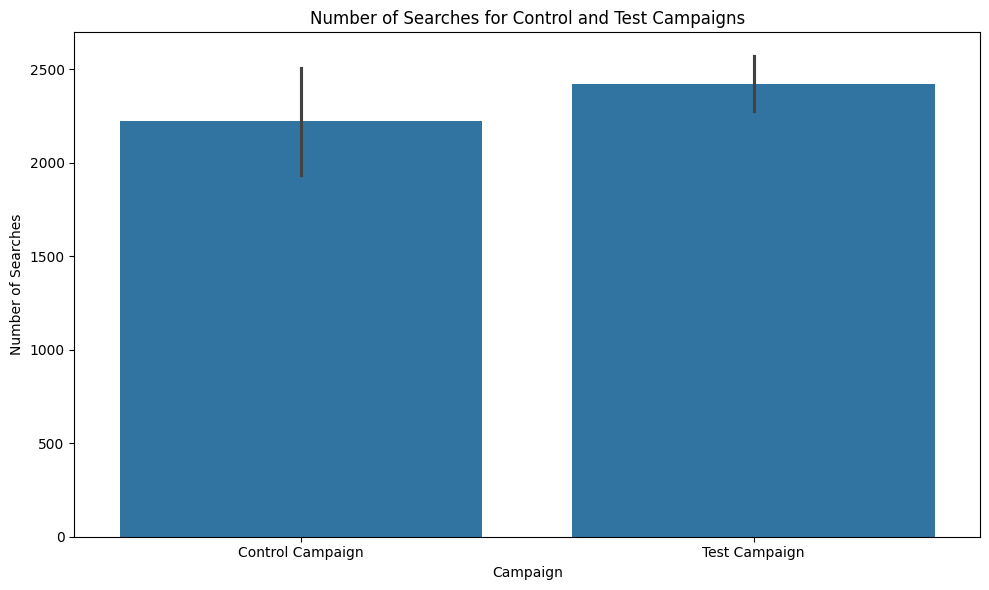

In [23]:


plt.figure(figsize=(10, 6))


combined_data = control_data.assign(Campaign="Control Campaign").append(test_data.assign(Campaign="Test Campaign"))

sns.barplot(data=combined_data, x="Campaign", y="Searches Received")

plt.title('Number of Searches for Control and Test Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Searches')

plt.tight_layout()
plt.show()


**The test campaign resulted in more searches**

Now, analysing number of clicks from both campaigns.

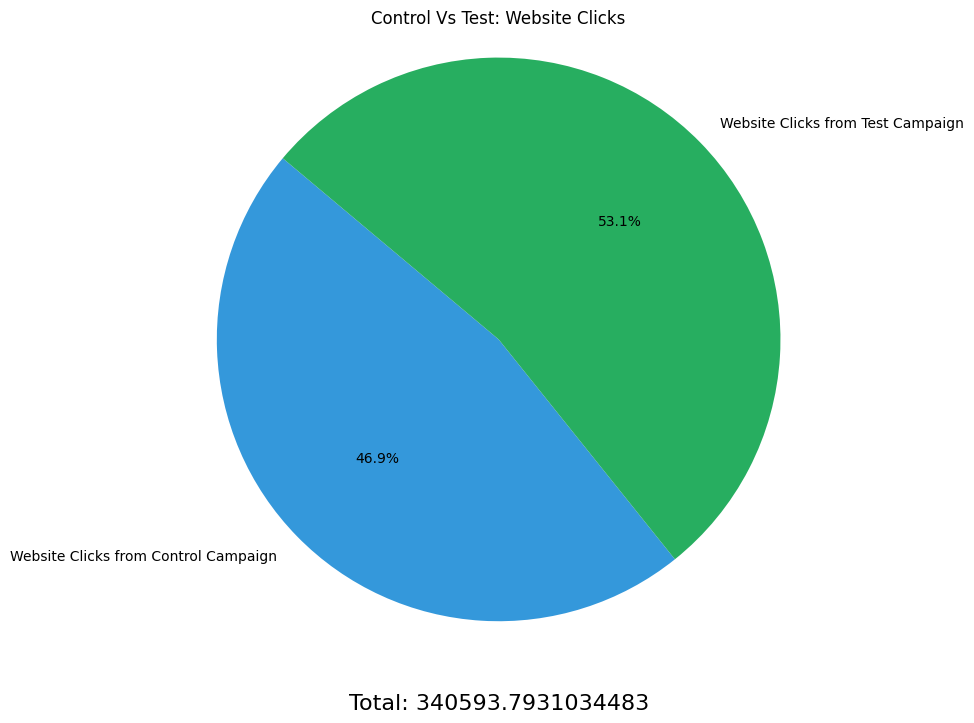

In [24]:
import matplotlib.pyplot as plt

labels = ["Website Clicks from Control Campaign", "Website Clicks from Test Campaign"]
counts = [sum(control_data["Website Clicks"]), sum(test_data["Website Clicks"])]
colors = ['#3498db', '#27ae60']


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title('Control Vs Test: Website Clicks')

plt.annotate(f'Total: {sum(counts)}', xy=(0.5, -0.1), fontsize=16, xycoords='axes fraction', ha='center')

plt.axis('equal')

plt.show()


**The test campaign has more number of clicks**

Amount of content that was viewed after reaching the website via both campaigns.

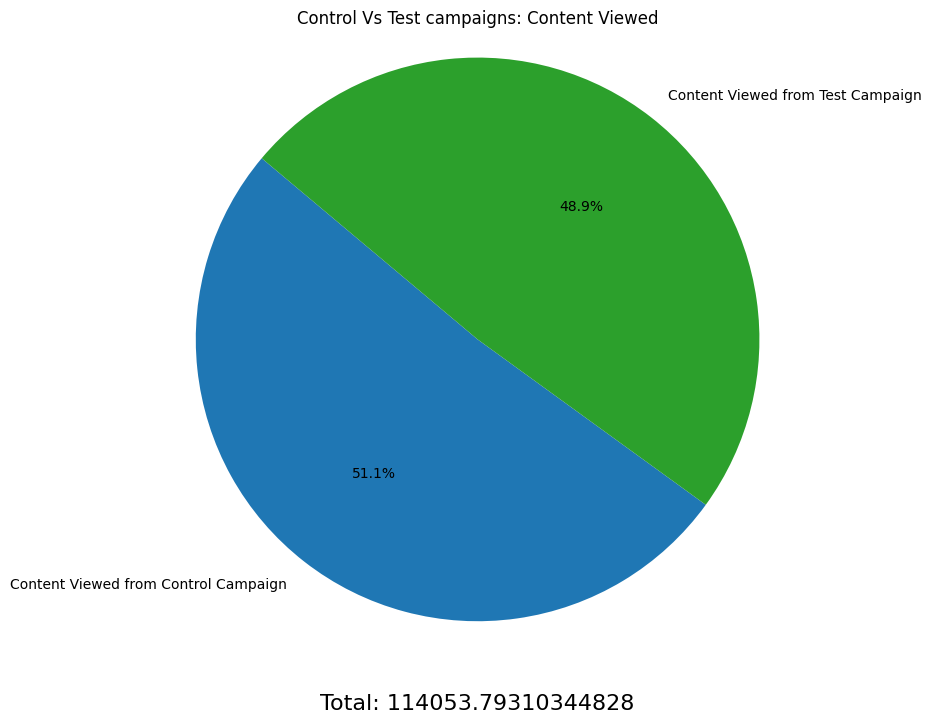

In [28]:
labels = ["Content Viewed from Control Campaign", "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]), sum(test_data["Content Viewed"])]
colors = ['#1f77b4', '#2ca02c']  # Blue and Green colors


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Control Vs Test campaigns: Content Viewed')


plt.annotate(f'Total: {sum(counts)}', xy=(0.5, -0.1), fontsize=16, xycoords='axes fraction', ha='center')

plt.axis('equal')

plt.show()

**CONTROL CAMPAIGN has higher content viewed than test campaign. Although the content viewed difference is less, given the fact that test campaign has more number of clicks, this implies higher audience engagement because of the CONTROL CAMPAIGN.**

Number of products added to cart because of both campaigns

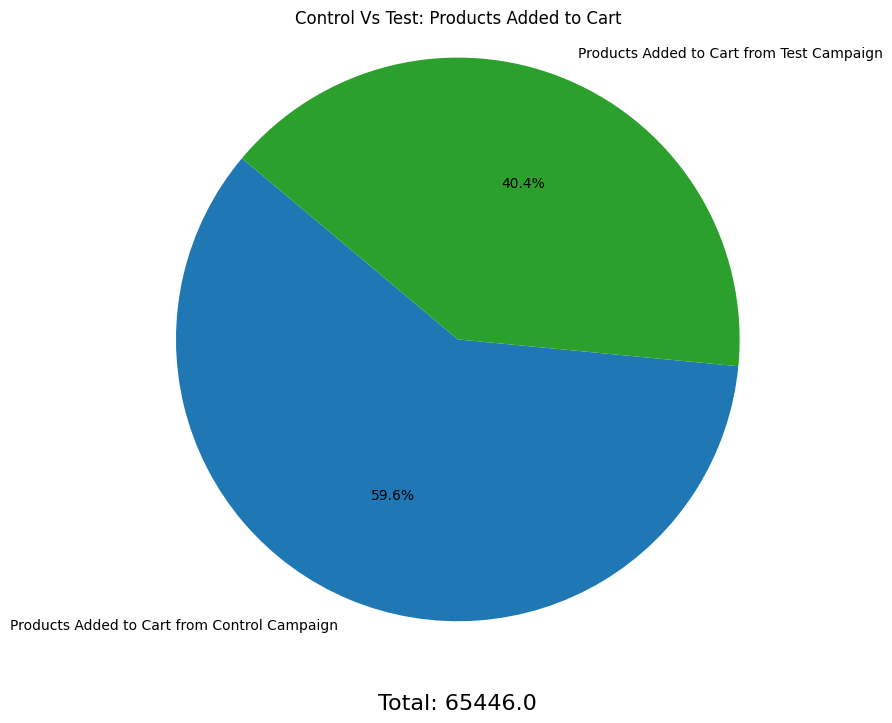

In [27]:
labels = ["Products Added to Cart from Control Campaign", "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), sum(test_data["Added to Cart"])]
colors = ['#1f77b4', '#2ca02c']  # Blue and Green colors

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title('Control Vs Test: Products Added to Cart')


plt.annotate(f'Total: {sum(counts)}', xy=(0.5, -0.1), fontsize=16, xycoords='axes fraction', ha='center')

plt.axis('equal')
plt.show()

**Eventhough the control campaign has lower website clicks, more products are added to cart from the control campaign than due to test campaign.**

Amount spent on the campaigns.

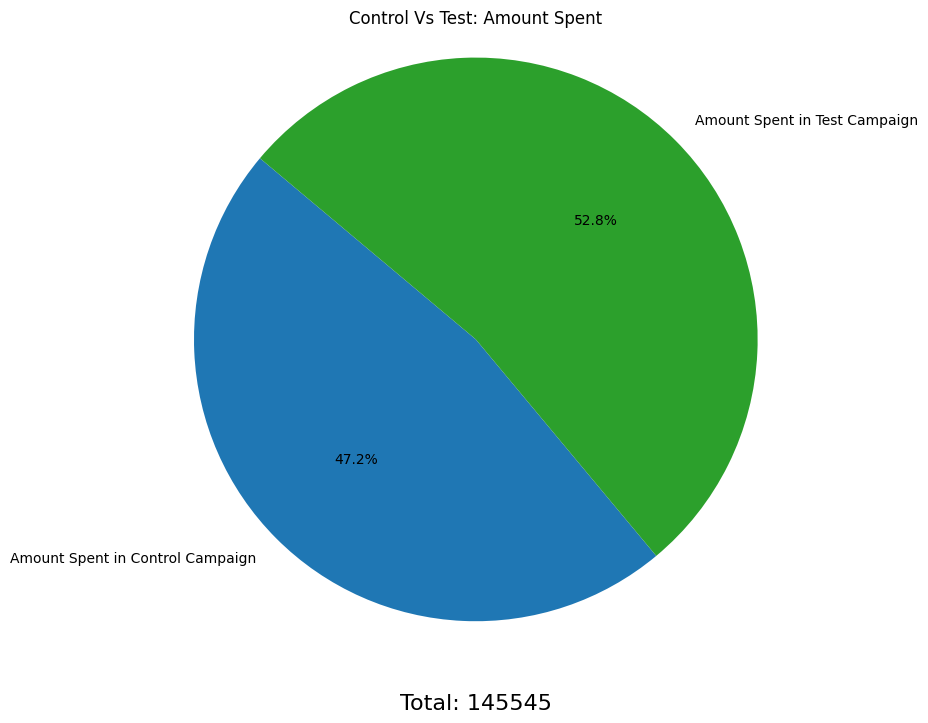

In [29]:

labels = ["Amount Spent in Control Campaign", "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), sum(test_data["Amount Spent"])]
colors = ['#1f77b4', '#2ca02c']  # Blue and Green colors

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title('Control Vs Test: Amount Spent')

plt.annotate(f'Total: {sum(counts)}', xy=(0.5, -0.1), fontsize=16, xycoords='axes fraction', ha='center')

plt.axis('equal')
plt.show()


**The test campaign incurred a higher expenditure compared to the control campaign. However, observing that the control campaign yielded more content views and had more products added to the cart, it becomes evident that the control campaign is more effective than the test campaign.**

Purchases made by both campaigns

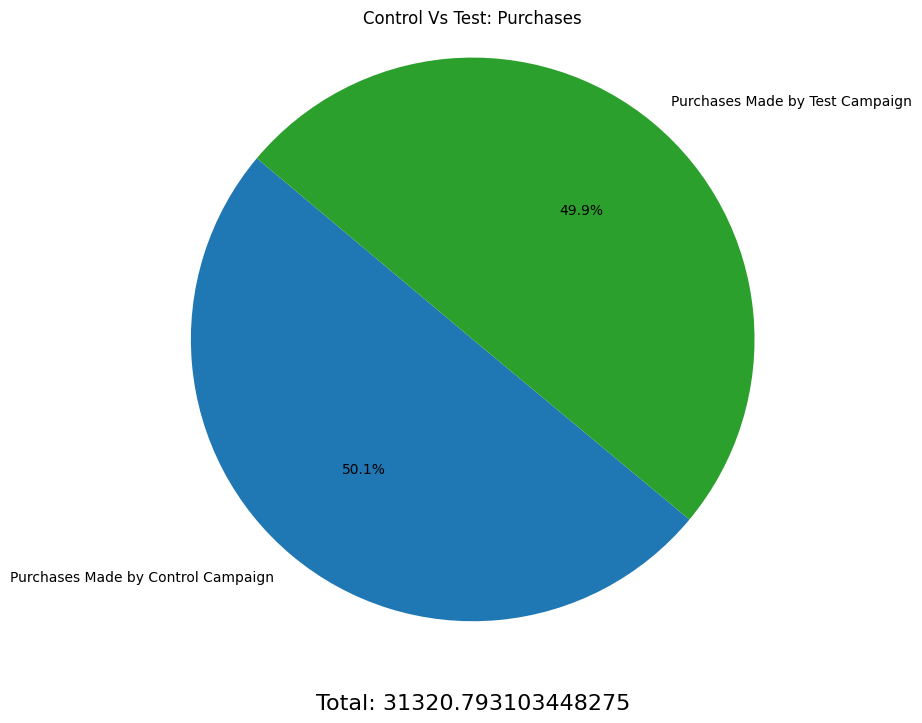

In [30]:

labels = ["Purchases Made by Control Campaign", "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), sum(test_data["Purchases"])]
colors = ['#1f77b4', '#2ca02c']  # Blue and Green colors


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title('Control Vs Test: Purchases')


plt.annotate(f'Total: {sum(counts)}', xy=(0.5, -0.1), fontsize=16, xycoords='axes fraction', ha='center')

plt.axis('equal')
plt.show()


**With only a marginal 1% difference in purchases made from both ad campaigns, the Control campaign emerges victorious. Considering that the Control campaign achieved more sales with a lower marketing expenditure, it establishes its effectiveness in this aspect.**

Let us look at relationship between the:

1.number of website clicks and content viewed from both campaigns.

2.amount of content viewed and the number of products added to the cart from both campaigns.

3.number of products added to the cart and the number of sales from both campaigns.

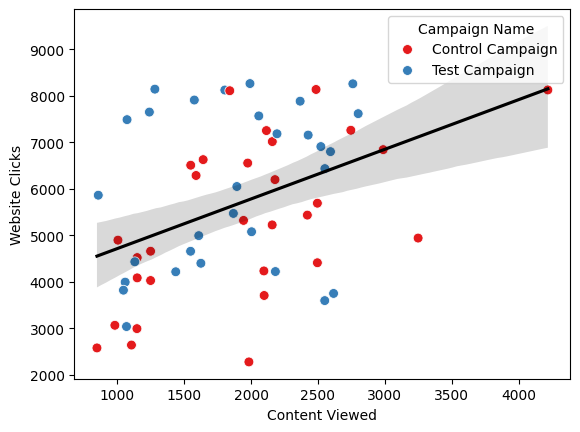

In [31]:

sns.scatterplot(data=ab_data, x="Content Viewed", y="Website Clicks", hue="Campaign Name", palette="Set1", s=50)


sns.regplot(data=ab_data, x="Content Viewed", y="Website Clicks", scatter=False, color='black')

plt.show()


**Despite the higher number of website clicks in the test campaign, the control campaign outperforms in terms of engagement resulting from those clicks.**

Therefore, the** control campaign** emerges as the winner in this comparison.

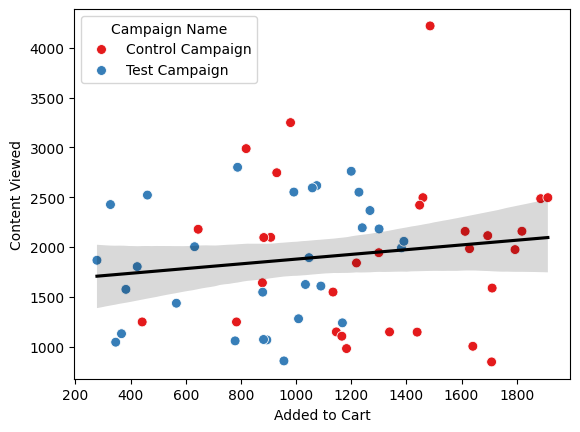

In [32]:

sns.scatterplot(data=ab_data, x="Added to Cart", y="Content Viewed", hue="Campaign Name", palette="Set1", s=50)

sns.regplot(data=ab_data, x="Added to Cart", y="Content Viewed", scatter=False, color='black')

plt.show()


Here also **control campaign** outperforms test campaign.

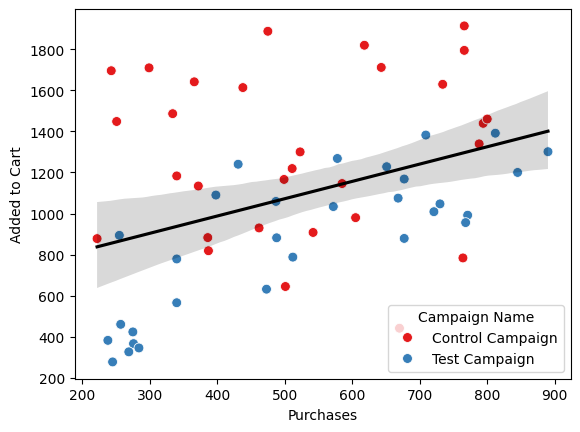

In [33]:

sns.scatterplot(data=ab_data, x="Purchases", y="Added to Cart", hue="Campaign Name", palette="Set1", s=50)


sns.regplot(data=ab_data, x="Purchases", y="Added to Cart", scatter=False, color='black')

plt.show()


The **control campaign** resulted in **more sales and more products in the cart,**

The **conversion rate of the test campaign is higher.**

# Conclusion

From the conducted A/B tests, it is evident that the **control campaign has achieved superior outcomes in terms of sales and engagement with visitors.**

The **control campaign exhibited higher product views, leading to more items added to the cart and ultimately more sales.**

However, it's noteworthy that the **conversion rate of products in the cart to purchases is higher in the test campaign.**

The **test campaign,** despite resulting in more sales based on the products viewed and added to the cart, **didn't surpass the overall sales generated by the control campaign.**

This indicates that the **test campaign could be effectively utilized to market a specific product to a targeted audience.** On the other hand, **the control campaign proves beneficial for marketing multiple products to a broader audience.**

The strategic use of both campaigns aligns with their respective strengths and objectives.